##  <div align="center">Tarea 2 - Simulación de Redes TEL[341]</div> 

***Nombre***: Alan Nuñez Estay

***ROL***: 201730024-8

<div>En esta tarea se busca simular la ocupación de enlaces de unos determinados tipos red con determinado tamaño de enlaces, el cual irá variando su capacidad a medida que el simulador avance, hasta alcanzar una probabilidad máxima de 10^-3.</div>
<div>La llegada de un usuario tiene predefinida su ruta a través de la red, el tiempo en que va a estar haciendo uso de los enlaces esta determiando por la variable aleatoria exponencial y tiempo medio t_on, como también lo hará para el tiempo de llegda a la red con tiempo medio de llegada t_off, cabe destacar que si la probabilidad máxima no es alcanzada y la capacidad de los enlaces llega a 0, el simulador termina, debido a la física de los enlaces no pueden tener capacidad negativa.</div>

In [2]:
import pandas as pd
import numpy as np
import math
from operator import itemgetter
import matplotlib.pyplot as plt

#Función para calcular el tiempo con un modelo exponencial

def calcula_tiempo(tasa):
    random_number = np.random.rand(1)
    tiempo = (-1/tasa)*math.log(random_number) 


    return tiempo


In [6]:
#Función para crear un DataFrame a partir de los archivos entregados para las rutas de cada red
#Los archivos se encuentran en una subcarpeta de nombre 'rutas'

def create_df(file_name):
    df = pd.read_csv('./rutas/'+file_name,header=None)
    df = df[0].str.split('\t', expand=True)
    return df

#Función para limpiar y moldear el dataset de mejor manera para trabajarlo y obtener la capacidad máxima de los enlaces para
#determinada topología de red

def clean_df_and_C(df):
    df = df[df[0] != df[1]][6:].reset_index(drop=True)
    C = df.iloc[:,3:].apply(pd.value_counts).sum(axis=1).max()
    df['rutas'] = df.iloc[:,3:].apply(
            lambda x: [i for i in x.dropna().astype(int)],
            axis=1
        )
    return df, C


clean_df_and_C(create_df('EuroCore.rut'))

(      0  1  2   3     4     5        rutas
 0     0  1  1   0  None  None          [0]
 1     0  2  2   0     8  None       [0, 8]
 2     0  3  3   6    19    16  [6, 19, 16]
 3     0  4  2   2    29  None      [2, 29]
 4     0  5  1   2  None  None          [2]
 ..   .. .. ..  ..   ...   ...          ...
 105  10  5  1  37  None  None         [37]
 106  10  6  1  41  None  None         [41]
 107  10  7  2  49    45  None     [49, 45]
 108  10  8  2  49    47  None     [49, 47]
 109  10  9  1  49  None  None         [49]
 
 [110 rows x 7 columns],
 4.0)

In [3]:
#Función para incializar una FEL para el simulador a partir de una cantidad determinada de usuarios

def create_FEL(usuarios):
    t_off = 20000
    t_on = 1000
    q = 20
    FEL = []
    for i in range(usuarios):
        FEL.append([i,'OFF',calcula_tiempo(t_off)])
    FEL.sort(key=itemgetter(2))
    return FEL

In [18]:
#Función simulador similar a la Tarea 1

# def simulator_canales(FEL,N,L,M,C,usuarios,enlaces,df):

#     t_off = 0.002333
#     t_on = 0.001
#     LLEGADAS = math.pow(10,6)
#     usuarios = usuarios
#     enlaces = enlaces
#     FEL_sim = FEL
#     P = 0
#     C_sim = C
#     par_prob_c = []

#     while (usuarios[:,1].sum() <= LLEGADAS):
#         eventoActual = FEL_sim.pop(0)

#         if (eventoActual[1] == 'OFF'):
#             usuarios[eventoActual[0],1] += 1

#             if (np.all(enlaces[ df['rutas'][eventoActual[0]] ]) == True):
#                 enlaces[ df['rutas'][eventoActual[0]] ] -= 1
#                 tiempo_nuevo = eventoActual[2] + calcula_tiempo(1/t_on)
#                 eventoActual[1] = 'ON'
#                 eventoActual[2] = tiempo_nuevo
            
#             elif (np.all(enlaces[ df['rutas'][eventoActual[0]] ]) == False):
#                 usuarios[eventoActual[0],0] += 1
#                 tiempo_nuevo = eventoActual[2] + calcula_tiempo(1/t_off)
#                 eventoActual[2] = tiempo_nuevo
        
#         elif (eventoActual[1] == 'ON'):
#             enlaces[ df['rutas'][eventoActual[0]] ] += 1
#             tiempo_nuevo = eventoActual[2] + calcula_tiempo(1/t_off)
#             eventoActual[2] = tiempo_nuevo
#             eventoActual[1] = 'OFF'
        
#         FEL_sim.append(eventoActual)
#         FEL_sim.sort(key=itemgetter(2))

#     P = usuarios[:,0].sum() / usuarios[:,1].sum()
#     par_prob_c.append(C_sim)
#     par_prob_c.append(P)
#     print('Capacidad actual: ',C_sim, '  |   Prob de Bloqueo: ',P)
    
    
#     return usuarios, par_prob_c
def simulator_canales(FEL,M,C):

    t_off = 20000
    t_on = 1000
    LLEGADAS = math.pow(10,3)
    bloqueos = 0
    usuarios = 0
    FEL_sim = FEL
    P = 1
    C_sim = C
    par_prob_c = []
    print('Capacidad actual: ',C_sim)

    while (usuarios <= LLEGADAS):
        eventoActual = FEL_sim.pop(0)

        if (eventoActual[1] == 'OFF'):
            usuarios += 1
            FEL.append([eventoActual[0],'OFF',calcula_tiempo(t_off)])

            if (C_sim > 0):
                C_sim -= 1
                tiempo_nuevo = eventoActual[2] + calcula_tiempo(t_on)
                eventoActual[1] = 'ON'
                eventoActual[2] = tiempo_nuevo
                FEL_sim.append(eventoActual)
            
            elif (C_sim <= 0):
                bloqueos += 1
                #tiempo_nuevo = eventoActual[2] + calcula_tiempo(t_off)
                #eventoActual[2] = tiempo_nuevo
        
        elif (eventoActual[1] == 'ON'):
            C_sim += 1
            #tiempo_nuevo = eventoActual[2] + calcula_tiempo(t_off)
            #eventoActual[2] = tiempo_nuevo
            #eventoActual[1] = 'OFF'
        
        #FEL_sim.append(eventoActual)
        FEL_sim.sort(key=itemgetter(2))

    P = bloqueos / usuarios
    par_prob_c.append(C_sim)
    par_prob_c.append(P)
    print('llegadas: ',usuarios,'Prob de Bloqueo: ',P,' Bloqueos: ',bloqueos)
    
    
    return usuarios, par_prob_c

In [19]:
def simulator_t3():
    C = 0
    par_prob_c = []
    P = 1
    M = 1

    while( P >= math.pow(10,-3)):

        usuarios = M
        FEL = create_FEL(M)
        usuarios_sim, par_prob_c_sim = simulator_canales(FEL,M,C)
        P = par_prob_c_sim[1]
        par_prob_c.append(par_prob_c_sim)
        print('capacidad: ',C)
        C += 1
    return C,P
simulator_t3()

Capacidad actual:  0
llegadas:  1001 Prob de Bloqueo:  1.0  Bloqueos:  1001
capacidad:  0
Capacidad actual:  1
llegadas:  1001 Prob de Bloqueo:  0.999000999000999  Bloqueos:  1000
capacidad:  1
Capacidad actual:  2
llegadas:  1001 Prob de Bloqueo:  0.998001998001998  Bloqueos:  999
capacidad:  2
Capacidad actual:  3
llegadas:  1001 Prob de Bloqueo:  0.997002997002997  Bloqueos:  998
capacidad:  3
Capacidad actual:  4
llegadas:  1001 Prob de Bloqueo:  0.996003996003996  Bloqueos:  997
capacidad:  4
Capacidad actual:  5
llegadas:  1001 Prob de Bloqueo:  0.994005994005994  Bloqueos:  995
capacidad:  5
Capacidad actual:  6
llegadas:  1001 Prob de Bloqueo:  0.9920079920079921  Bloqueos:  993
capacidad:  6
Capacidad actual:  7
llegadas:  1001 Prob de Bloqueo:  0.9920079920079921  Bloqueos:  993
capacidad:  7
Capacidad actual:  8
llegadas:  1001 Prob de Bloqueo:  0.986013986013986  Bloqueos:  987
capacidad:  8
Capacidad actual:  9
llegadas:  1001 Prob de Bloqueo:  0.988011988011988  Bloqueos:

(698, 0.0)

In [6]:
#Función principal del simulador que usa internamente el simulador de la Tarea 1 con algunas modificiaciones 

def simulator_Net(N,M,L,C,df):

    C_sim = C
    par_prob_c = []
    P = 0
    df = df
    while(P < math.pow(10,-3)):

        if(C_sim == 0):
            print('La capacidad de los enlaces es nula, o de 0 Bits/s')
            return 0

        enlaces = np.full(L,C_sim) 
        usuarios = np.full((M,2),0)
        FEL = create_FEL(M)

        usuarios_sim, par_prob_c_sim = simulator_canales(FEL,N,L,M,C_sim,usuarios,enlaces,df)
        par_prob_c.append(par_prob_c_sim)
        P = par_prob_c_sim[1]
        C_sim -= 1 
    
    df['Prob Bloqueo'] = usuarios_sim[:,0] / usuarios_sim[:,1]

    return P, par_prob_c, df

In [7]:
#Funció para crear los gráficos (2 por cada topología de red) 

def graficar(df,par_prob_c):
    x_axis_capacidad = []
    y_axis_prob = []
    for i in range(len(par_prob_c)):
        x_axis_capacidad.append(par_prob_c[i][0])
        y_axis_prob.append(par_prob_c[i][1])


    df2 = df[[0,1,2,'Prob Bloqueo']]
    data = df2.groupby(2).mean()
    
    fig, ax = plt.subplots(1,2,figsize=(16,8),sharey=False)
    ax[0].plot(data, label='Prob Bloqueo Promedia')
    ax[0].set_title('Prob Bloqueo v/s Salto')
    ax[0].set_xlabel('Saltos')
    ax[0].set_ylabel('Probabilidad')

    ax[1].plot(x_axis_capacidad,y_axis_prob,label='Prob Bloqueo') 
    ax[1].invert_xaxis()   
    ax[1].set_title('Prob Bloqueo v/s Capacidad')
    ax[1].set_xlabel('Capacidad de enlaces')
    ax[1].set_ylabel('Probabilidad de Bloqueo')


# Simulación para la red ArpaNet

Capacidad actual:  33.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  32.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  31.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  30.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  29.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  28.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  27.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  26.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  25.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  24.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  23.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  22.0   |   Prob de Bloqueo:  6.999993000007e-06
Capacidad actual:  21.0   |   Prob de Bloqueo:  1.8999981000019e-05
Capacidad actual:  20.0   |   Prob de Bloqueo:  7.1999928000072e-05
Capacidad actual:  19.0   |   Prob de Bloqueo:  0.000285999714000286
Capacidad actual:  18.0   |   Prob de Bloqueo:  0.00088999911000089
Capacidad actual:  17.0   |   Prob de Bloqueo:  0.002498997501002499


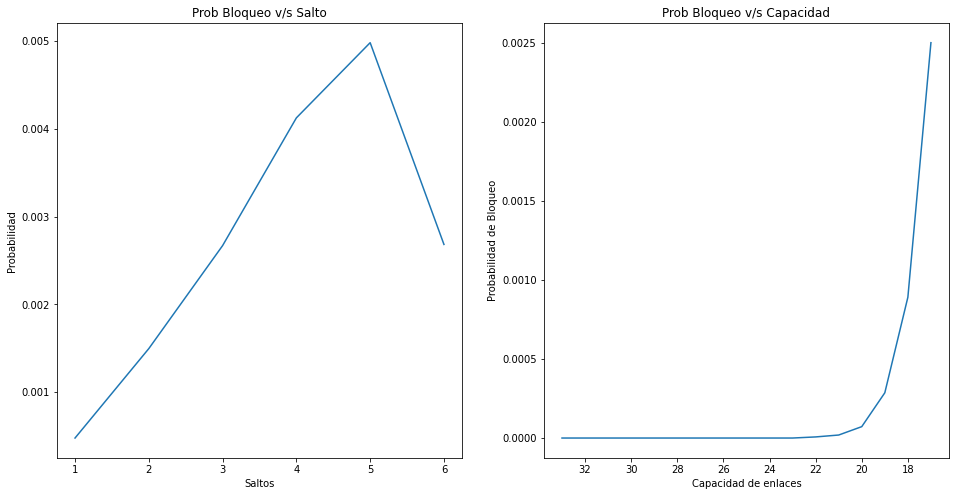

In [10]:
df_ArpaNet = create_df('ArpaNet.rut')
N_ArpaNet = int(df_ArpaNet[3][1])
L_ArpaNet = int(df_ArpaNet[3][2])
M_ArpaNet = N_ArpaNet*(N_ArpaNet-1)
df_ArpaNet, C_ArpaNet = clean_df_and_C(df_ArpaNet)
P_ArpaNet, par_prob_c_ArpaNet, df_ArpaNet = simulator_Net(N_ArpaNet,M_ArpaNet,L_ArpaNet,C_ArpaNet,df_ArpaNet)
graficar(df_ArpaNet,par_prob_c_ArpaNet)

# Simulación para la red EON

Capacidad actual:  18.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  17.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  16.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  15.0   |   Prob de Bloqueo:  1.999998000002e-06
Capacidad actual:  14.0   |   Prob de Bloqueo:  1.999998000002e-06
Capacidad actual:  13.0   |   Prob de Bloqueo:  5.1999948000052e-05
Capacidad actual:  12.0   |   Prob de Bloqueo:  0.000257999742000258
Capacidad actual:  11.0   |   Prob de Bloqueo:  0.001481998518001482


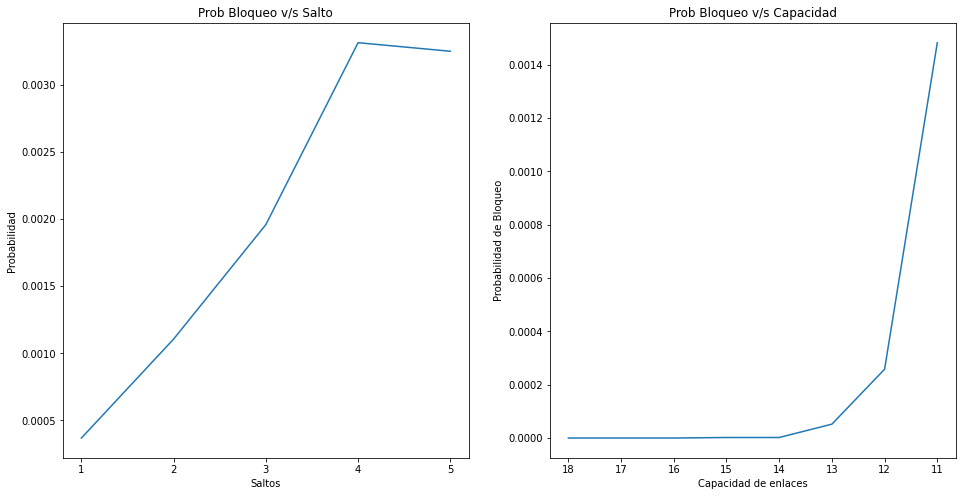

In [11]:
df_EON = create_df('EON.rut')
N_EON = int(df_EON[3][1])
L_EON = int(df_EON[3][2])
M_EON = N_EON*(N_EON-1)
df_EON, C_EON = clean_df_and_C(df_EON)
P_EON, par_prob_c_EON, df_EON = simulator_Net(N_EON,M_EON,L_EON,C_EON,df_EON)
graficar(df_EON,par_prob_c_EON)

# Simulación para la red EuroCore

Capacidad actual:  4.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  3.0   |   Prob de Bloqueo:  0.02642897357102643


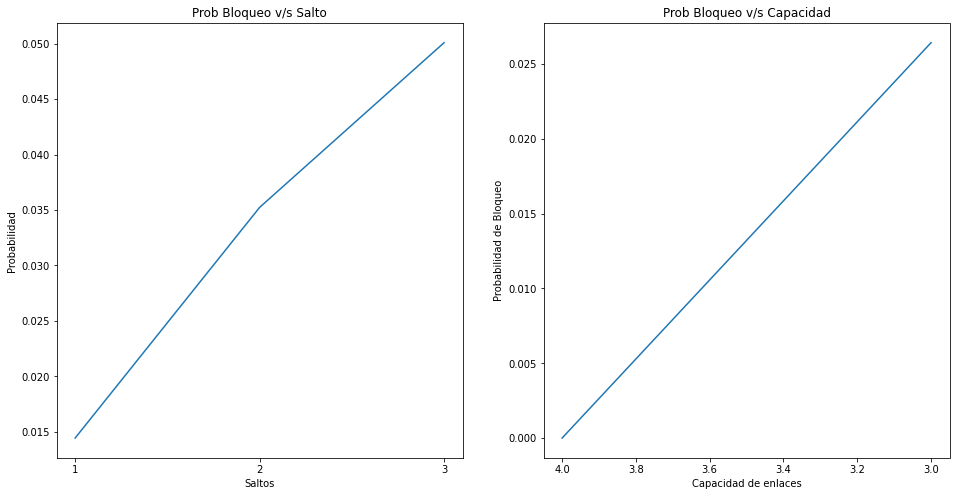

In [12]:
df_EuroCore = create_df('EuroCore.rut')
N_EuroCore = int(df_EuroCore[3][1])
L_EuroCore = int(df_EuroCore[3][2])
M_EuroCore = N_EuroCore*(N_EuroCore-1)
df_EuroCore, C_EuroCore = clean_df_and_C(df_EuroCore)
P_EuroCore, par_prob_c_EuroCore, df_EuroCore = simulator_Net(N_EuroCore,M_EuroCore,L_EuroCore,C_EuroCore,df_EuroCore)
graficar(df_EuroCore,par_prob_c_EuroCore)

# Simulación para la red EuroLarge

Capacidad actual:  89.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  88.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  87.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  86.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  85.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  84.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  83.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  82.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  81.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  80.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  79.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  78.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  77.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  76.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  75.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  74.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  73.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  72.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  71.0   |   Prob de Bloqueo:  0.0
Capacidad ac

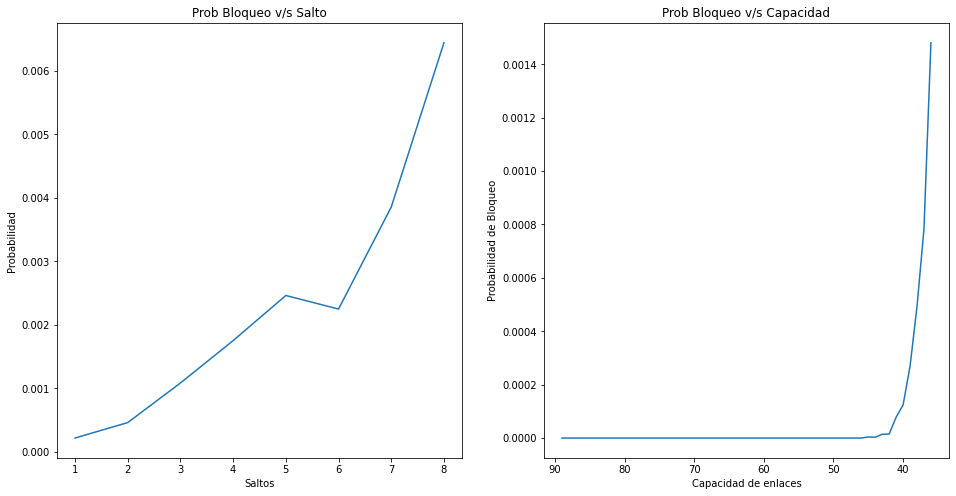

In [13]:
df_EuroLarge = create_df('EuroLarge.rut')
N_EuroLarge = int(df_EuroLarge[3][1])
L_EuroLarge = int(df_EuroLarge[3][2])
M_EuroLarge = N_EuroLarge*(N_EuroLarge-1)
df_EuroLarge, C_EuroLarge = clean_df_and_C(df_EuroLarge)
P_EuroLarge, par_prob_c_EuroLarge, df_EuroLarge = simulator_Net(N_EuroLarge,M_EuroLarge,L_EuroLarge,C_EuroLarge,df_EuroLarge)
graficar(df_EuroLarge,par_prob_c_EuroLarge)

# Simulación para la red NSFNet

Capacidad actual:  13.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  12.0   |   Prob de Bloqueo:  9.99999000001e-07
Capacidad actual:  11.0   |   Prob de Bloqueo:  1.0999989000011e-05
Capacidad actual:  10.0   |   Prob de Bloqueo:  0.000132999867000133
Capacidad actual:  9.0   |   Prob de Bloqueo:  0.000925999074000926
Capacidad actual:  8.0   |   Prob de Bloqueo:  0.005076994923005077


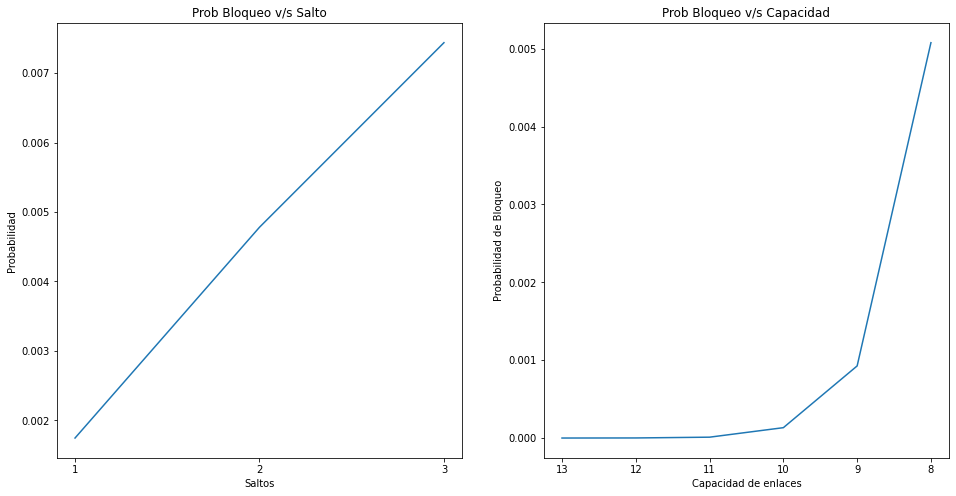

In [8]:
df_NSFNet = create_df('NSFNet.rut')
N_NSFNet = int(df_NSFNet[3][1])
L_NSFNet = int(df_NSFNet[3][2])
M_NSFNet = N_NSFNet*(N_NSFNet-1)
df_NSFNet, C_NSFNet = clean_df_and_C(df_NSFNet)
P_NSFNet, par_prob_c_NSFNet, df_NSFNet = simulator_Net(N_NSFNet,M_NSFNet,L_NSFNet,C_NSFNet,df_NSFNet)
graficar(df_NSFNet,par_prob_c_NSFNet)

# Simulación para la red UKNet

Capacidad actual:  21.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  20.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  19.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  18.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  17.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  16.0   |   Prob de Bloqueo:  0.0
Capacidad actual:  15.0   |   Prob de Bloqueo:  2.1999978000022e-05
Capacidad actual:  14.0   |   Prob de Bloqueo:  0.000165999834000166
Capacidad actual:  13.0   |   Prob de Bloqueo:  0.000747999252000748
Capacidad actual:  12.0   |   Prob de Bloqueo:  0.002787997212002788


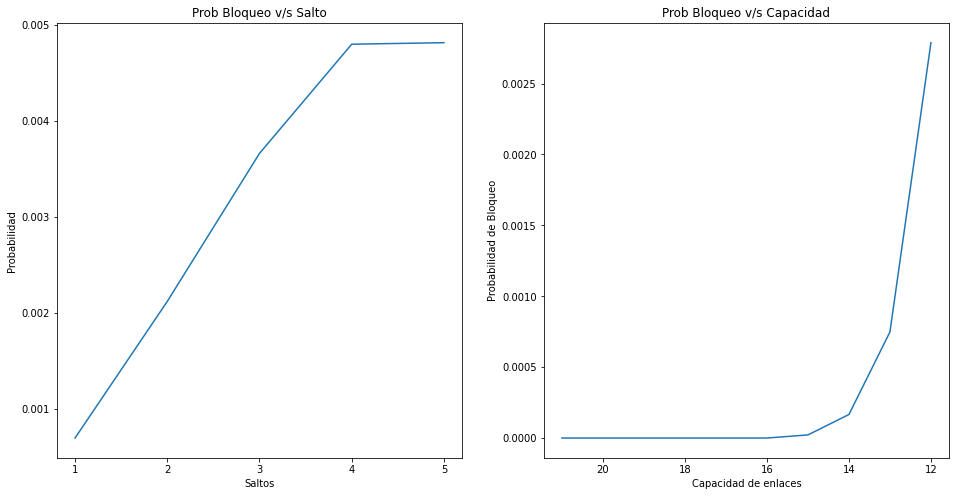

In [10]:
df_UKNet = create_df('UKNet.rut')
N_UKNet = int(df_UKNet[3][1])
L_UKNet = int(df_UKNet[3][2])
M_UKNet = N_UKNet*(N_UKNet-1)
df_UKNet, C_UKNet = clean_df_and_C(df_UKNet)
P_UKNet, par_prob_c_UKNet, df_UKNet = simulator_Net(N_UKNet,M_UKNet,L_UKNet,C_UKNet,df_UKNet)
graficar(df_UKNet, par_prob_c_UKNet)